<b><h1>Bank Marketing Dataset Analysis using Decision Tree Classifier

> Build a Decision Tree Classifier to predict whether a customer will purchase a product or service based on demographic and behavioral data.

📌 **Dataset Source**: UCI Machine Learning Repository  
📌 **Target Variable**: `y` (term deposit subscription: yes/no)


<b><h3> 📊 About the Dataset

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution.  
The goal is to predict if a client will subscribe to a term deposit.

<b><h4> 📌 Key Features

| Column         | Description                                                   |
|----------------|---------------------------------------------------------------|
| age            | Age of client                                                 |
| job            | Type of job                                                   |
| marital        | Marital status                                                |
| education      | Education level                                               |
| default        | Credit in default?                                            |
| housing        | Housing loan?                                                 |
| loan           | Personal loan?                                                |
| contact        | Contact communication type                                    |
| month          | Last contact month                                            |
| day_of_week    | Last contact day                                              |
| duration       | Last contact duration (in seconds)                            |
| campaign       | Number of contacts during this campaign                       |
| pdays          | Days since last contact from previous campaign                |
| previous       | Number of contacts before this campaign                       |
| poutcome       | Outcome of previous campaign                                  |
| y              | Target: Term deposit subscription (yes/no)                   |


<b><h3> 1. Import Libraries & Load Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv("bank-additional-full.csv", delimiter=';')
df.rename(columns={'y':'subscribed_deposit'},inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<b><h3> 2. Dataset Summary & Cleaning

In [7]:
df.shape

(41188, 21)

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed_deposit'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 41188 non-null  int64  
 1   job                 41188 non-null  object 
 2   marital             41188 non-null  object 
 3   education           41188 non-null  object 
 4   default             41188 non-null  object 
 5   housing             41188 non-null  object 
 6   loan                41188 non-null  object 
 7   contact             41188 non-null  object 
 8   month               41188 non-null  object 
 9   day_of_week         41188 non-null  object 
 10  duration            41188 non-null  int64  
 11  campaign            41188 non-null  int64  
 12  pdays               41188 non-null  int64  
 13  previous            41188 non-null  int64  
 14  poutcome            41188 non-null  object 
 15  emp.var.rate        41188 non-null  float64
 16  cons

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
#check for null values
df.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
subscribed_deposit    0
dtype: int64

In [12]:
# Remove duplicates
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 12
Duplicates after: 0


<b><h3>3. Univariate Analysis

#### Separate numeric and categorical columns

In [15]:
df_obj = df.select_dtypes(include='object').columns
df_num = df.select_dtypes(exclude='object').columns

#### Numeric histograms

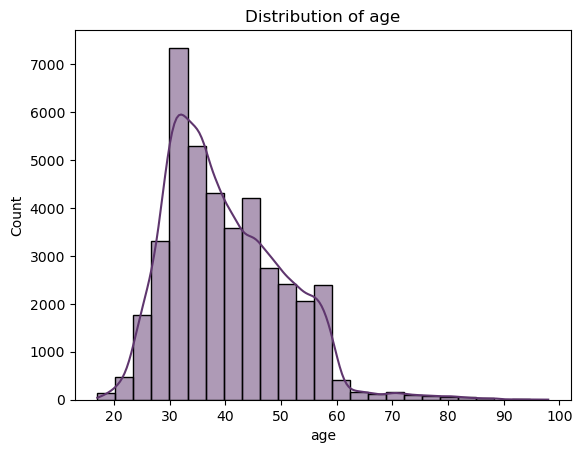

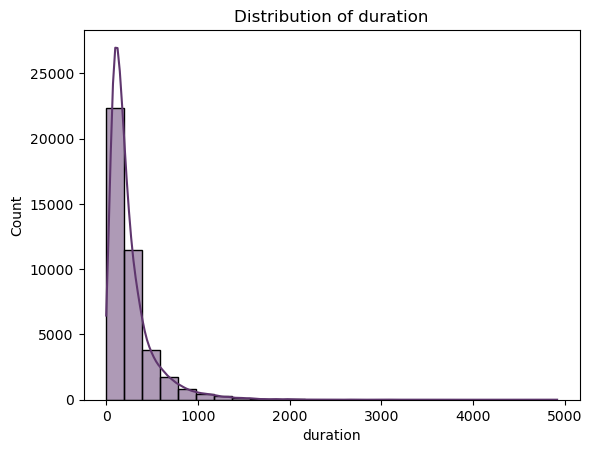

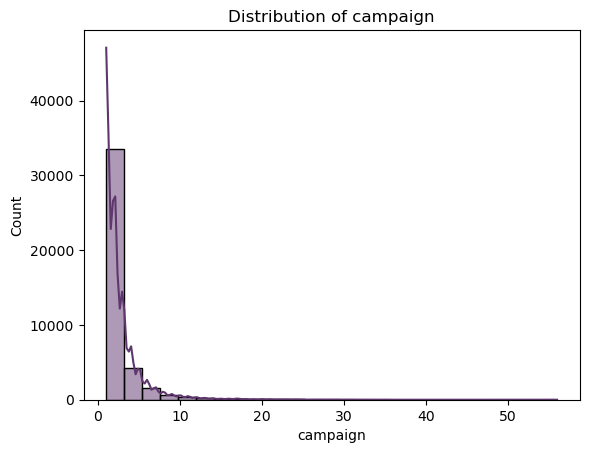

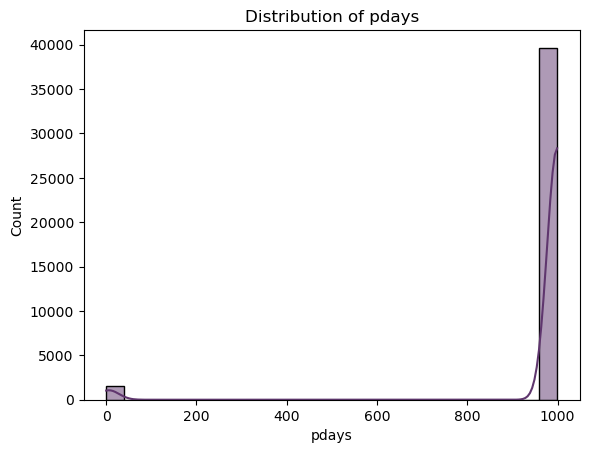

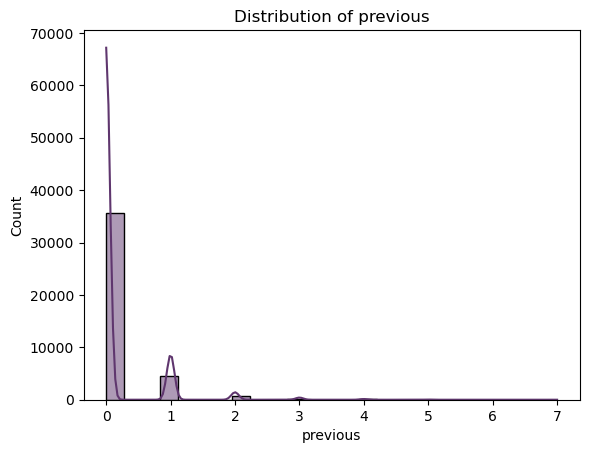

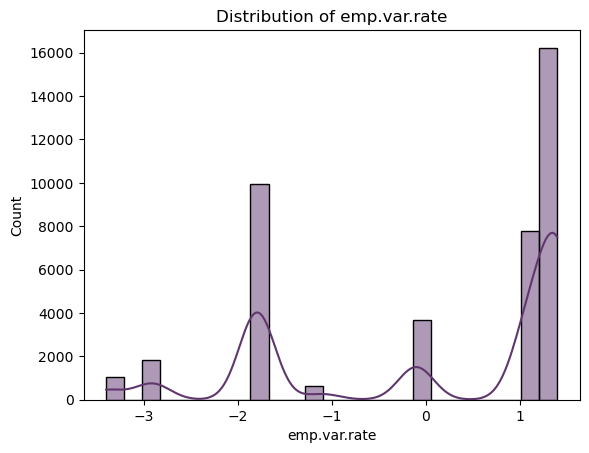

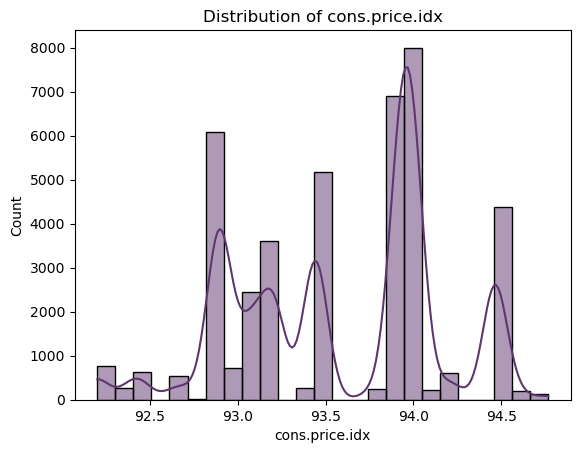

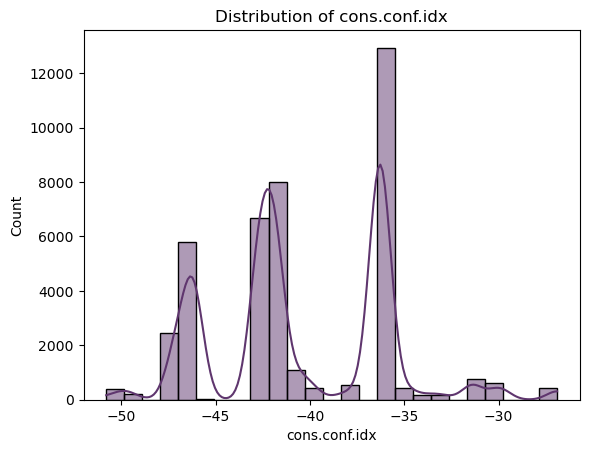

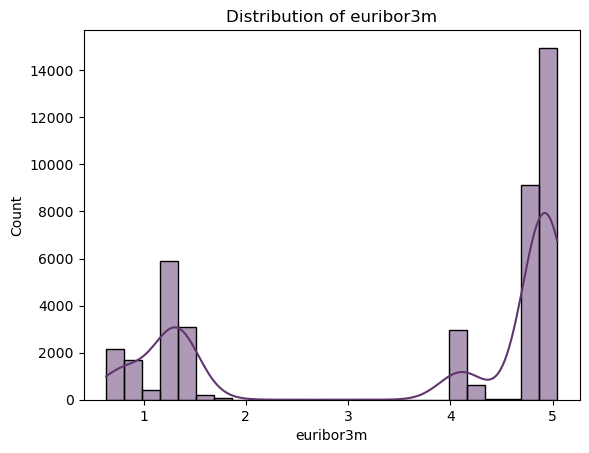

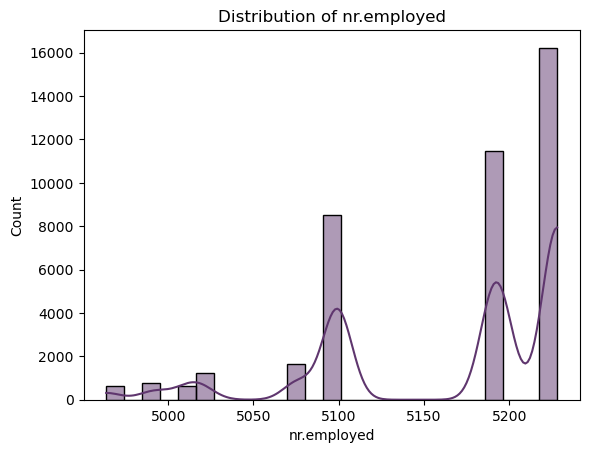

In [17]:
for feature in df_num:
    sns.histplot(x=feature, data=df, bins=25, kde=True, color='#5f366e')
    plt.title(f'Distribution of {feature}')
    plt.show()

#### Categorical bar plots

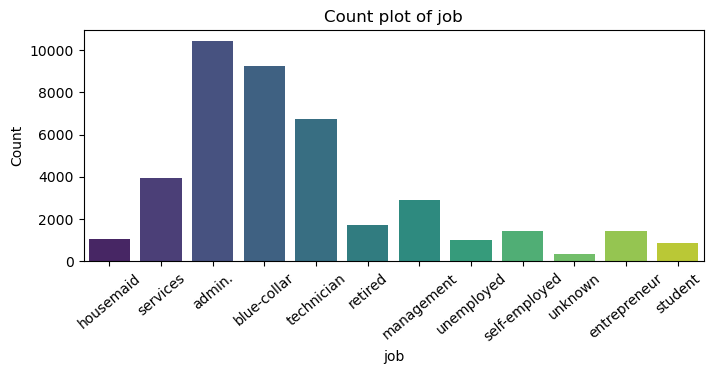

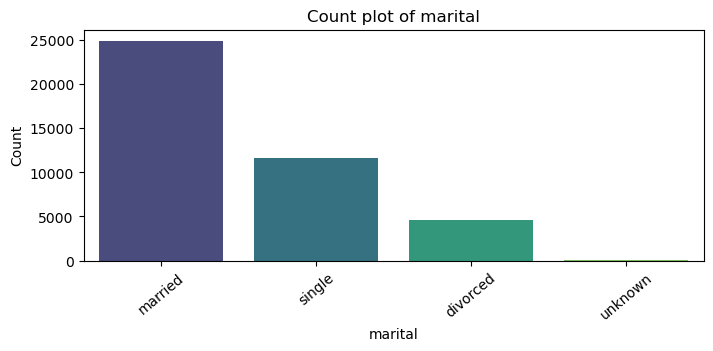

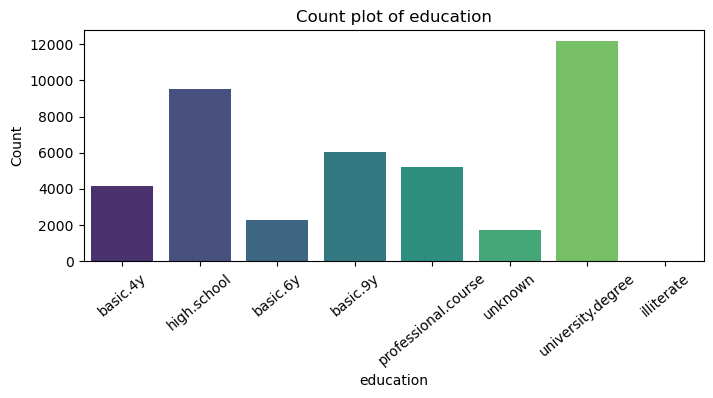

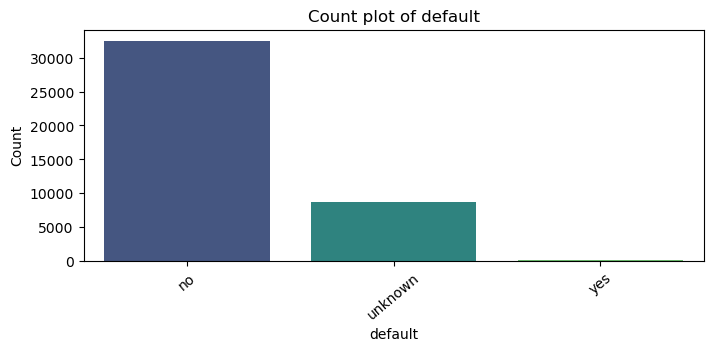

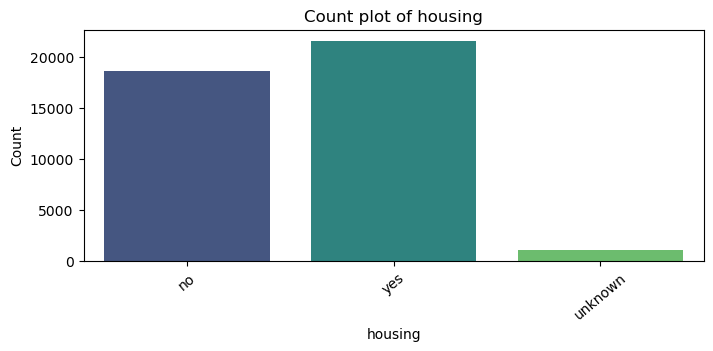

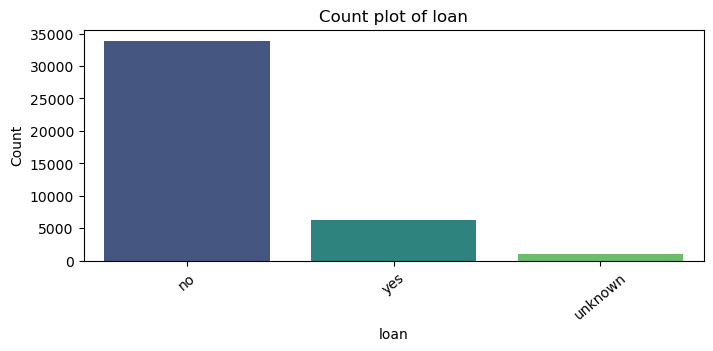

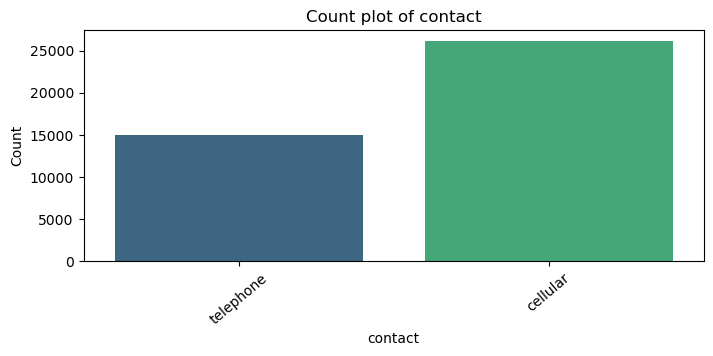

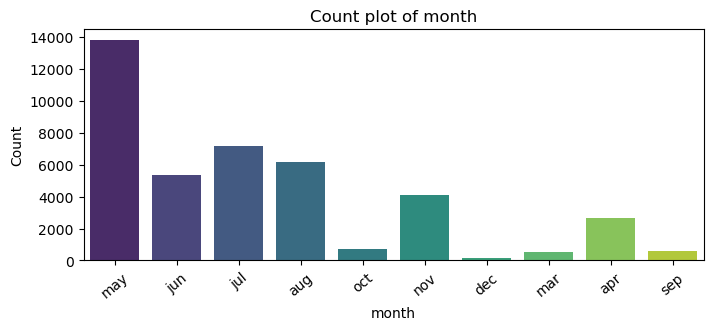

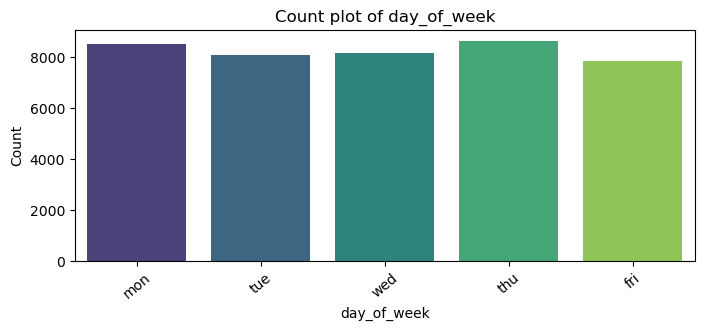

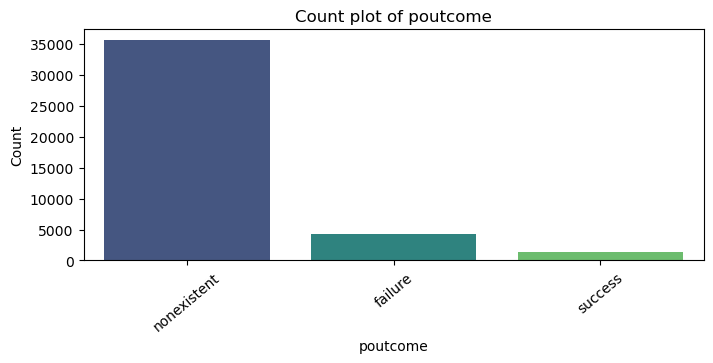

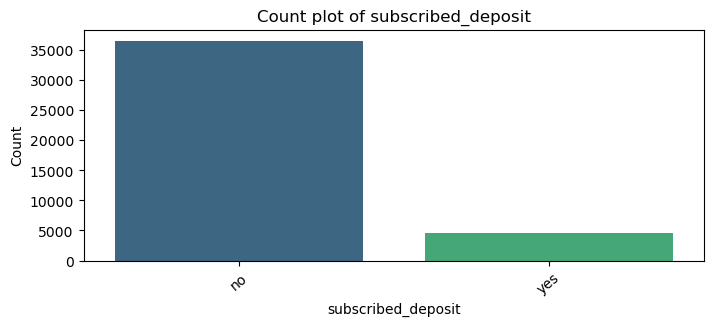

In [19]:
for feature in df_obj:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Count plot of {feature}')
    plt.ylabel('Count')
    plt.xticks(rotation=40)
    plt.show()

<b><h3>4. Outlier Detection & Treatment

#### Box plots before outlier treatment

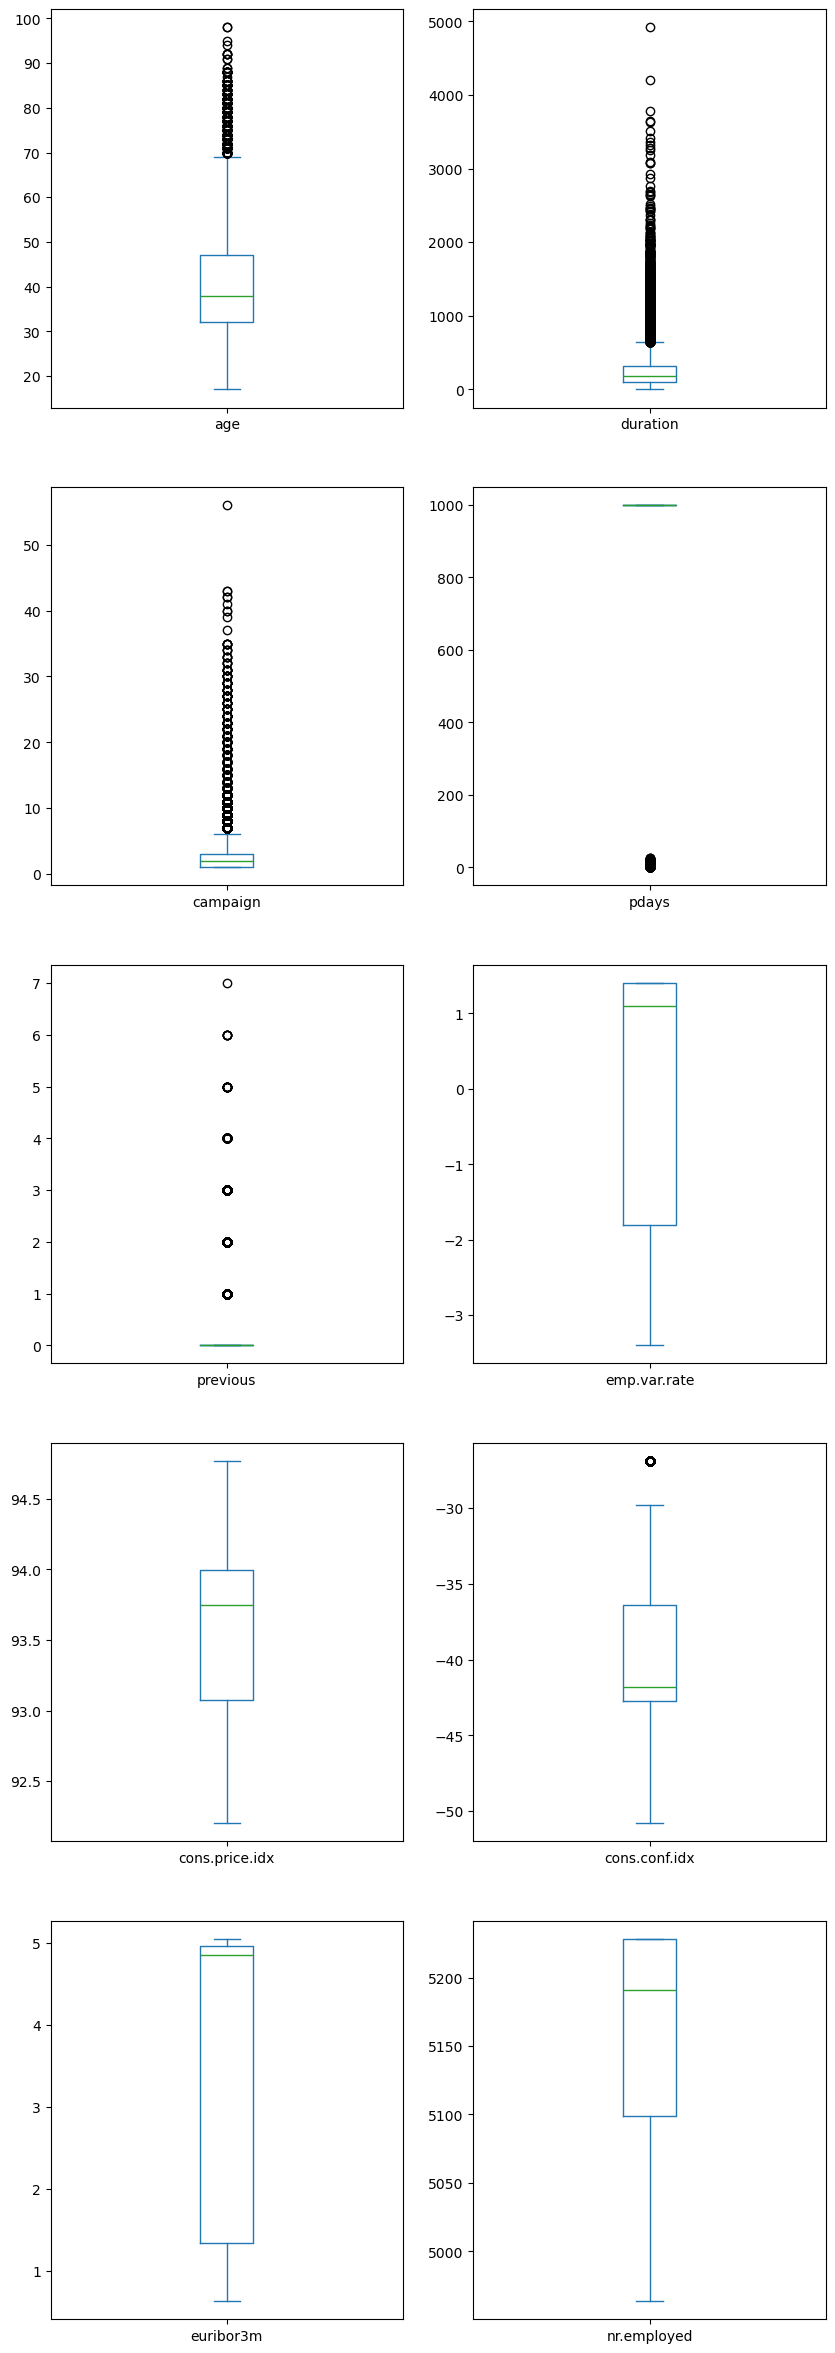

In [22]:
df.plot(kind='box', subplots=True, layout=(5, 2), figsize=(10, 30))
plt.show()

#### Remove outliers from selected columns

In [24]:
cols = ['age', 'campaign', 'duration']
for column in cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df = df[(df[column] >= lower) & (df[column] <= upper)]

#### Box plots after treatment

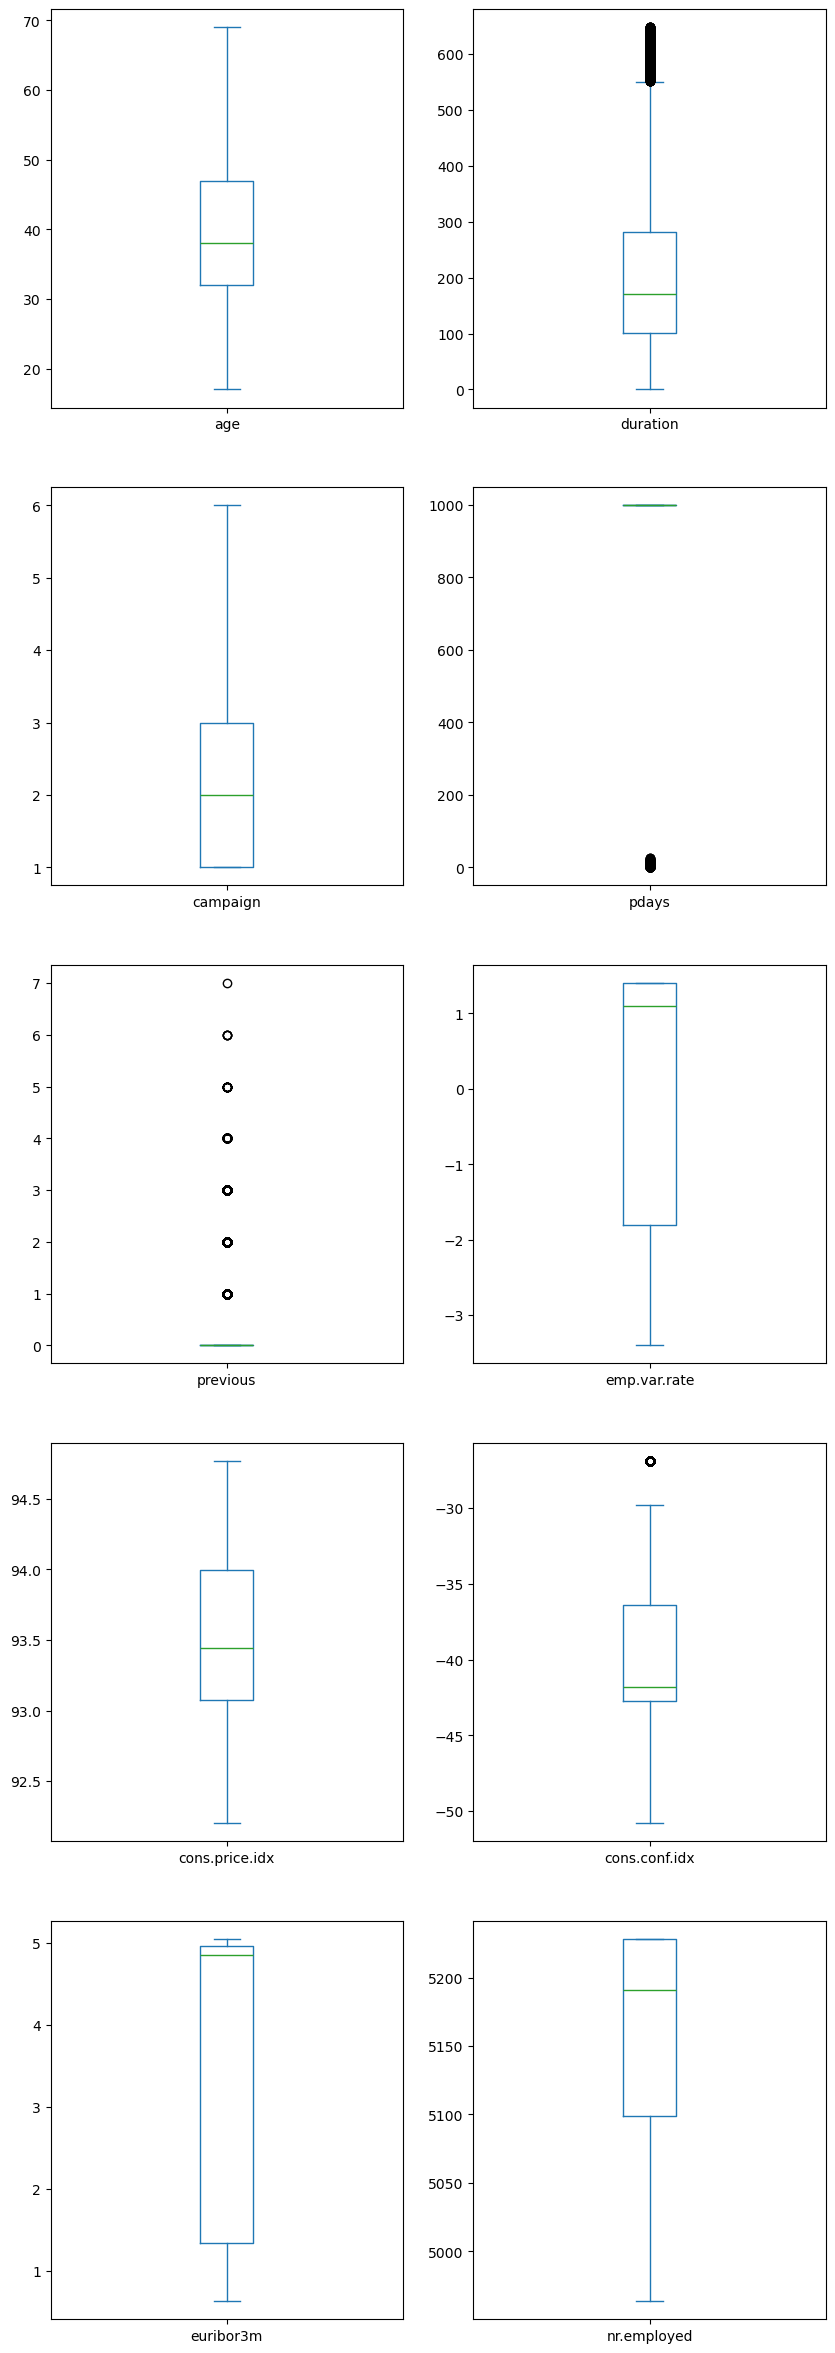

In [26]:
df.plot(kind='box', subplots=True, layout=(5, 2), figsize=(10, 30))
plt.show()

<b><h3>5. Correlation Analysis

#### Correlation matrix


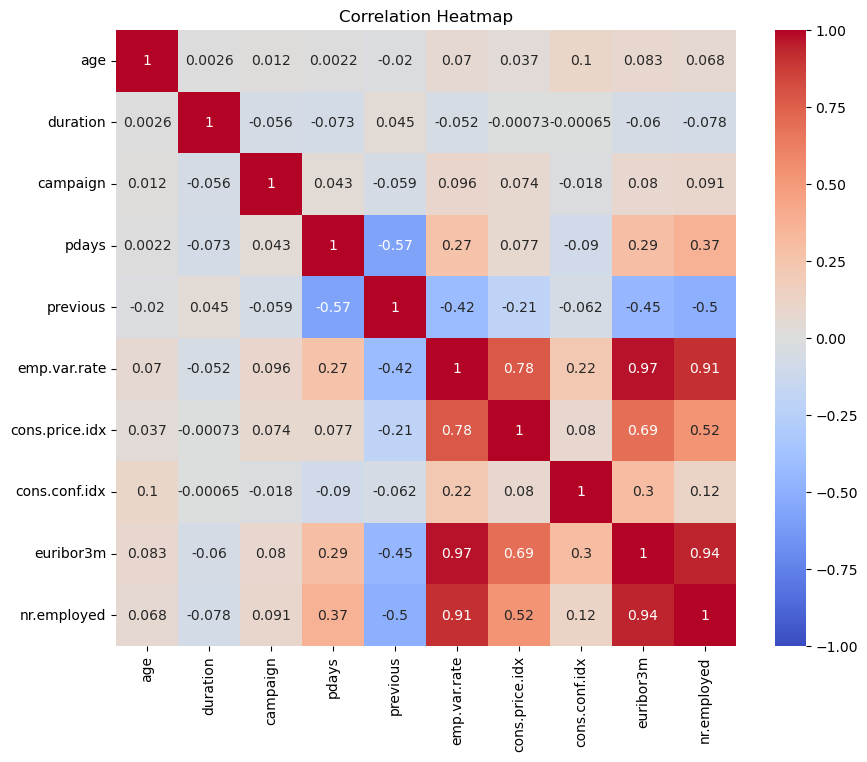

In [29]:
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#### Drop highly correlated features

In [31]:
high_corr_cols = ['emp.var.rate', 'euribor3m', 'nr.employed']
df1 = df.copy()
df1.drop(high_corr_cols, axis=1, inplace=True)

<b><h3>6. Label Encoding & Train-Test Split

#### Encode all columns

In [34]:
le = LabelEncoder()
df_encoded = df1.apply(le.fit_transform)

#### Features & Target

In [36]:
X = df_encoded.drop(columns='subscribed_deposit')
y = df_encoded['subscribed_deposit']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

<b><h3>7. Decision Tree Model (Gini)

In [39]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [40]:
print("Training accuracy:", dt_gini.score(X_train, y_train))
print("Testing accuracy:", dt_gini.score(X_test, y_test))

Training accuracy: 0.9369901547116737
Testing accuracy: 0.93314580403188


In [41]:
y_pred = dt_gini.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.93314580403188

Confusion Matrix:
 [[9599  214]
 [ 499  353]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      9813
           1       0.62      0.41      0.50       852

    accuracy                           0.93     10665
   macro avg       0.79      0.70      0.73     10665
weighted avg       0.92      0.93      0.93     10665



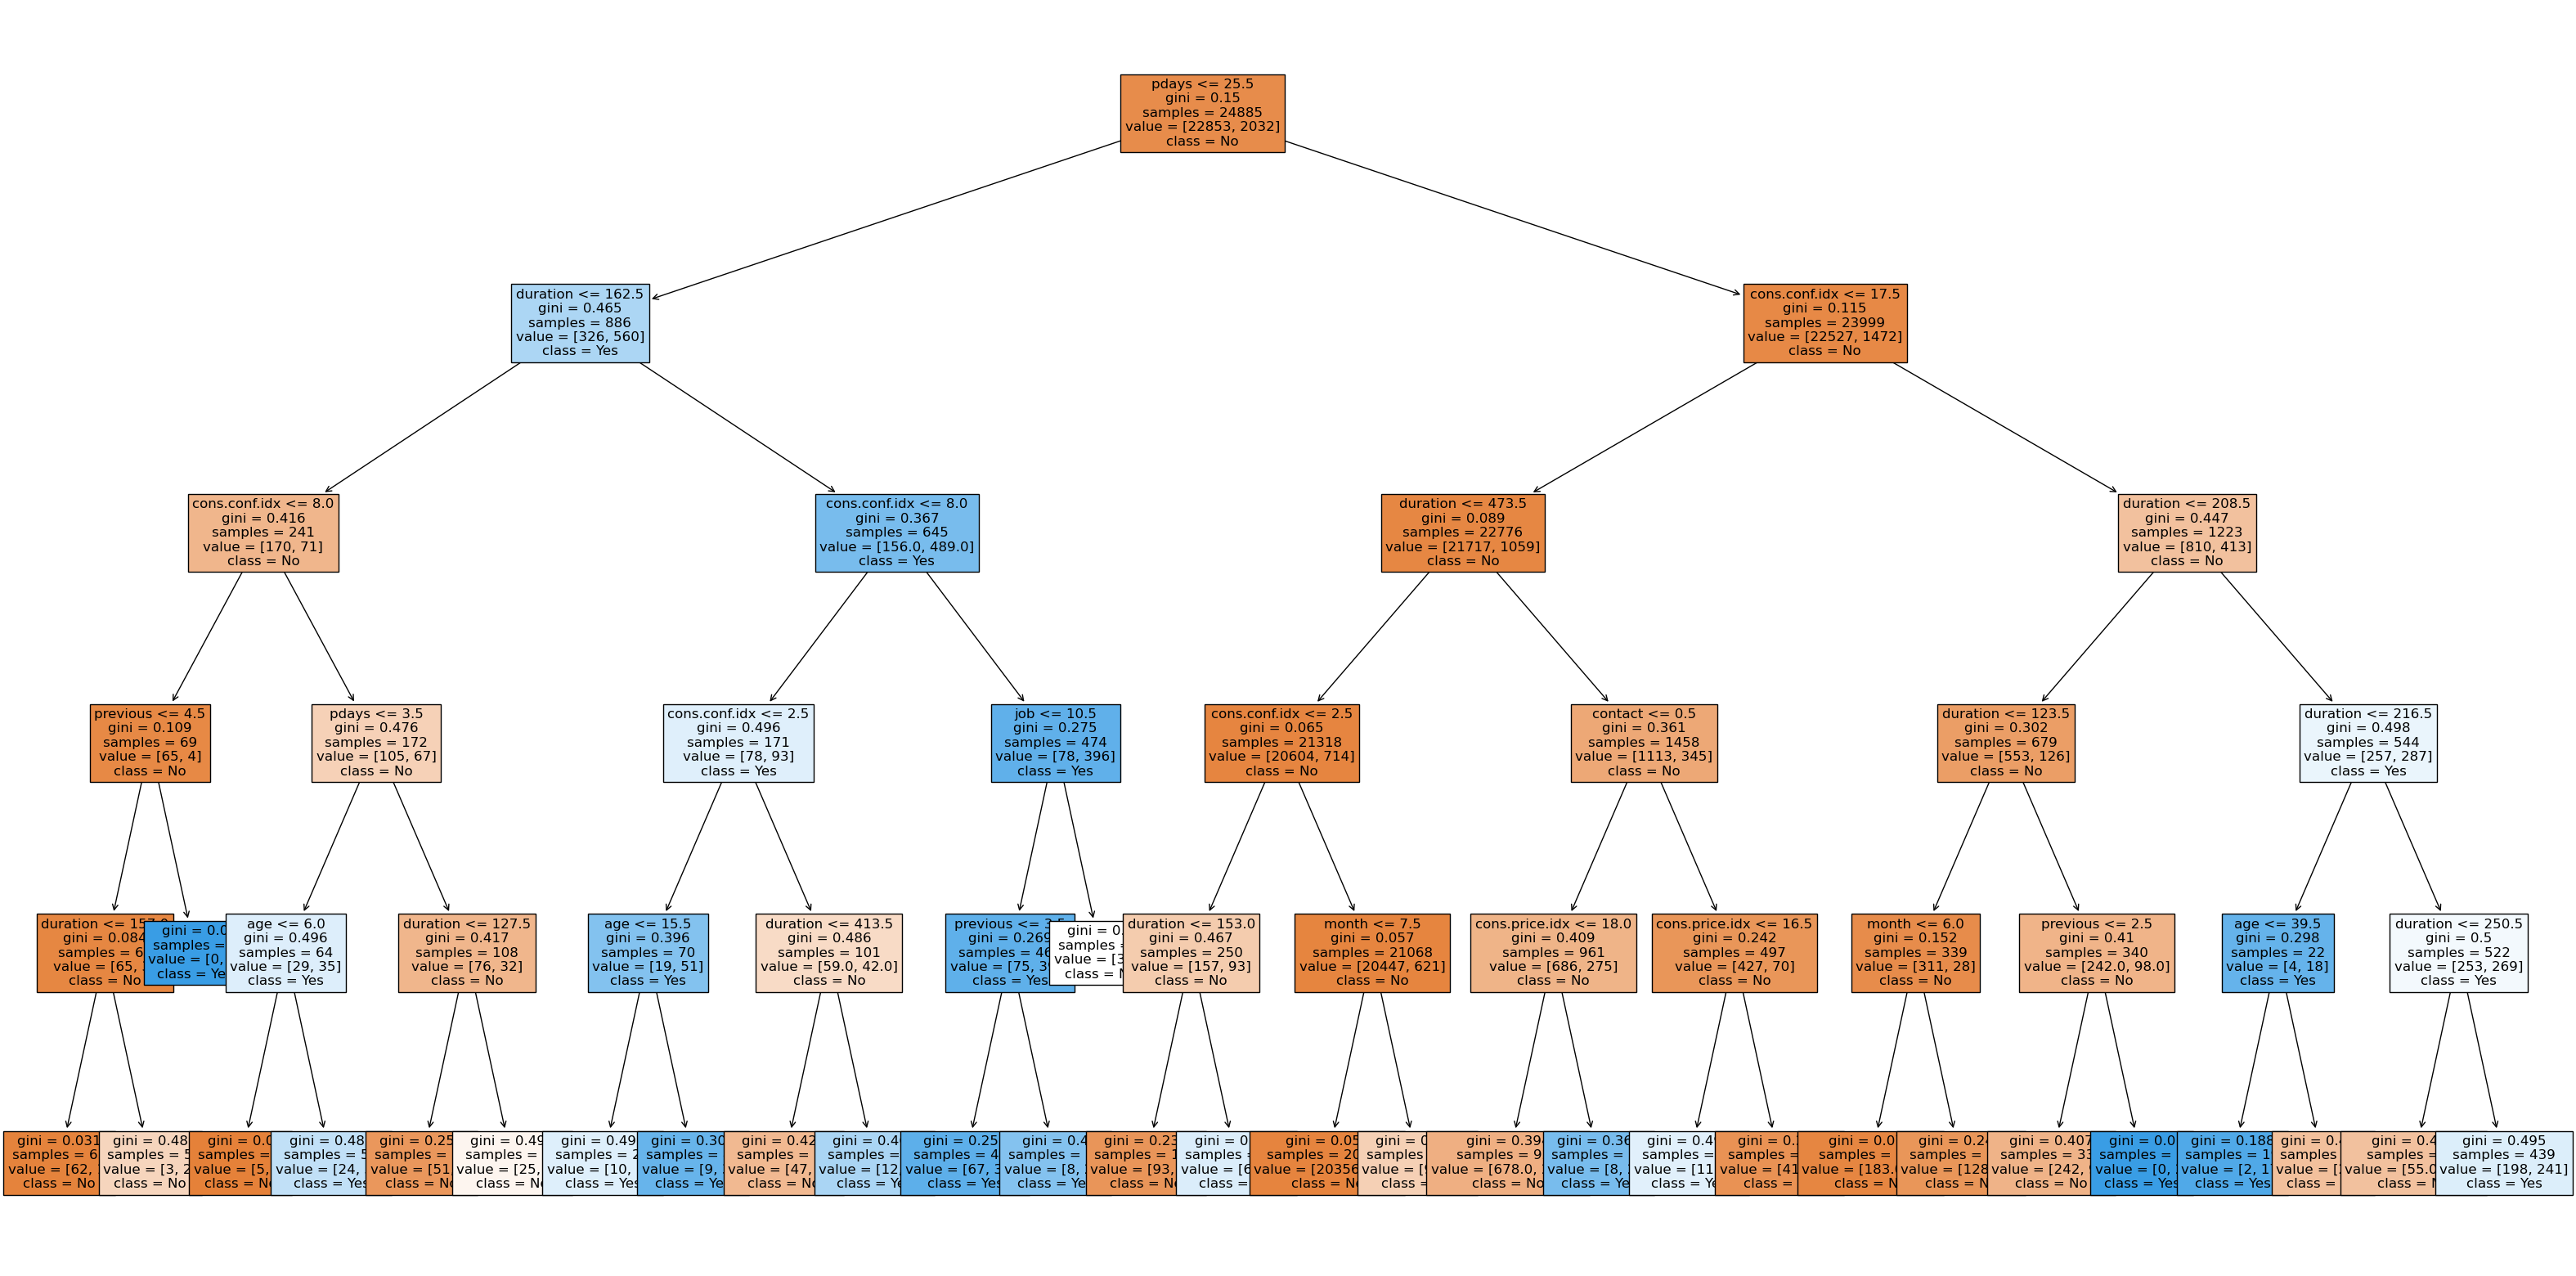

In [42]:
plt.figure(figsize=(40, 20))
plot_tree(dt_gini, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, fontsize=12)
plt.show()

<b><h3>8. Decision Tree Model (Entropy)

In [44]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [45]:
print("Training Accuracy:", dt_entropy.score(X_train, y_train))
print("Testing Accuracy:", dt_entropy.score(X_test, y_test))

Training Accuracy: 0.9359855334538879
Testing Accuracy: 0.9316455696202531


In [46]:
y_pred_entropy = dt_entropy.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_entropy))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print('\nClassification Report:\n', classification_report(y_test, y_pred_entropy))

Accuracy:  0.9316455696202531

Confusion Matrix:
 [[9654  159]
 [ 570  282]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      9813
           1       0.64      0.33      0.44       852

    accuracy                           0.93     10665
   macro avg       0.79      0.66      0.70     10665
weighted avg       0.92      0.93      0.92     10665



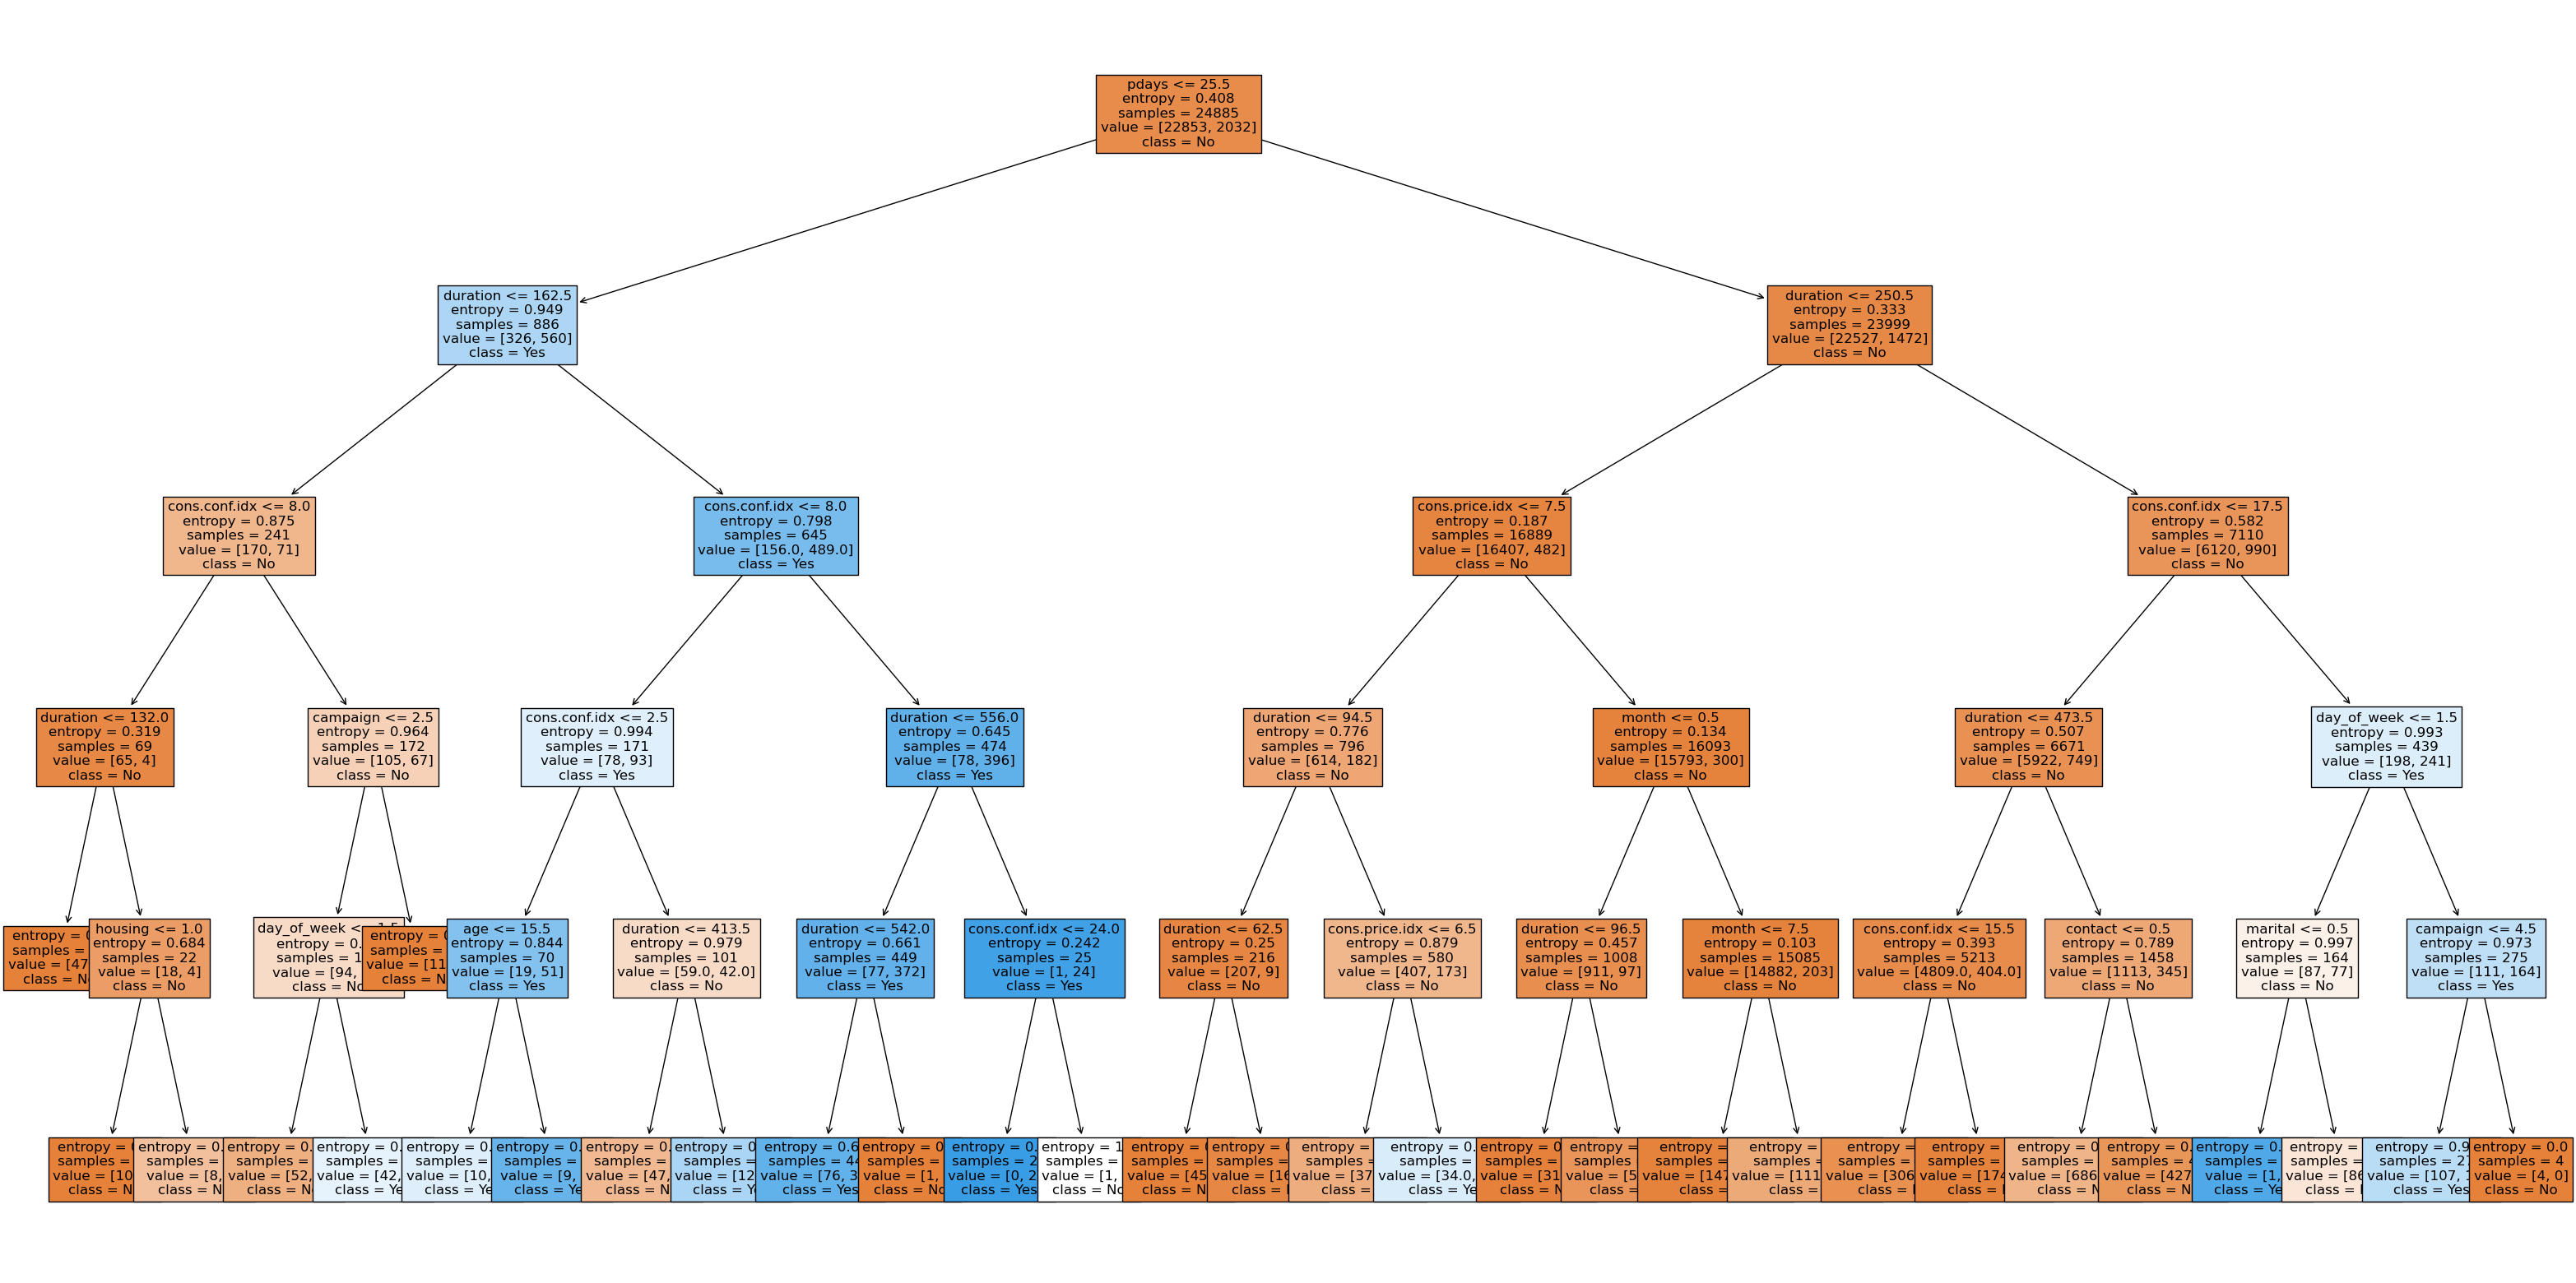

In [47]:
plt.figure(figsize=(40, 20))
plot_tree(dt_entropy, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, fontsize=12)
plt.show()

## ✅ Final Conclusion

- The model performs well with both Gini and Entropy criteria.
- Training Accuracy (Gini): 93.6% | Testing Accuracy (Gini): 93.3%
- Training Accuracy (Entropy): 93.6% | Testing Accuracy (Entropy): 93.2%

### 🔍 Observations:
- Gini has slightly better recall.
- Entropy produces fewer false positives.